In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Configurar pandas para ver texto completo
pd.set_option('display.max_colwidth', 150)

# Cargar el dataset limpio que se guardó antes
try:
    df = pd.read_csv('../data/datos_triaje_limpios.csv')
    print(f"✅ Datos cargados correctamente. Total de filas: {len(df)}")
except FileNotFoundError:
    print("❌ Error: No se encuentra el archivo. Verifica que se ejecuto el Notebook 1.")

# Cargar el modelo de lenguaje en español de Spacy
try:
    nlp = spacy.load("es_core_news_sm")
    print("✅ Modelo de lenguaje español (SpaCy) cargado.")
except OSError:
    print("❌ Error: Modelo de SpaCy no encontrado. Ejecuta en tu terminal: python -m spacy download es_core_news_sm")

✅ Datos cargados correctamente. Total de filas: 500
✅ Modelo de lenguaje español (SpaCy) cargado.


In [2]:
# Definir las palabras que se quiere eliminar (stopwords)
stopwords = nlp.Defaults.stop_words

def procesar_texto_medico(texto):
    # 1. Convertir a objeto SpaCy (Tokenización automática)
    doc = nlp(texto)
    
    tokens_limpios = []
    
    for token in doc:
        # Filtros:
        # - Que no sea signo de puntuación (is_punct)
        # - Que no sea una 'stopword' (is_stop)
        # - Que sea letras y no números sueltos (is_alpha)
        if not token.is_punct and not token.is_stop and token.is_alpha:
            # 2. Lematización: Tomar la raíz de la palabra (lemma_) y se pasa a minúsculas
            tokens_limpios.append(token.lemma_.lower())
            
    # Unir las palabras limpias de nuevo en una frase
    return " ".join(tokens_limpios)

# Probemos la función con un ejemplo
ejemplo = "El paciente presenta dolores fuertes en el abdomen y vómitos constantes."
print(f"Original: {ejemplo}")
print(f"Procesado: {procesar_texto_medico(ejemplo)}")

Original: El paciente presenta dolores fuertes en el abdomen y vómitos constantes.
Procesado: paciente presentar dolor fuerte abdomen vómito constante


In [3]:
print("⏳ Procesando todo el dataset (esto puede tardar unos segundos)...")

# Aplicar la función a la columna 'sintomas'
df['sintomas_procesados'] = df['sintomas'].apply(procesar_texto_medico)

print("✅ ¡Procesamiento terminado!")

# Comparar el Antes y el Después
display(df[['sintomas', 'sintomas_procesados']].head(5))

⏳ Procesando todo el dataset (esto puede tardar unos segundos)...
✅ ¡Procesamiento terminado!


,sintomas,sintomas_procesados
0,Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y...,describimos caso varón año vida previo activo referir dolor osteoarticular localización variable mes fiebre semana pico matutino vespertino c hora...
1,Se trata de una mujer de 29 años sometida a un estudio ecográfico pélvico de control tras una ligadura de trompas por vía laparoscópica. Durante e...,mujer año sometido estudio ecográfico pélvico control ligadura trompa vía laparoscópico detectar tumoración mm cara lateral derecho vejiga delimit...
2,"Varón de 36 años, sin antecedentes de interés, que fue estudiado en la consulta de medicina interna por presentar masa inguinoescrotal izquierda d...",varón año antecedente interés estudiar consulta medicina interno presentar masa inguinoescrotal izquierdo doloroso palpación mes evolución pérdida...
3,Mujer de 42 años en el momento de someterse a trasplante hepático.\nEntre sus antecedentes personales previos al trasplante destacan apendicectomí...,mujer año momento someter él trasplante hepático antecedente personal previo trasplante destacar apendicectomía año cirrosis hepático probable ori...
4,"Varón de 65 años que consultaba por un síndrome obstructivo infravesical junto con una tumoración blanda en el hemiescroto derecho, que disminuía ...",varón año consultar síndrome obstructivo infravesical tumoración blando hemiescroto derecho disminuir tamaño micción exploración físico destacar p...


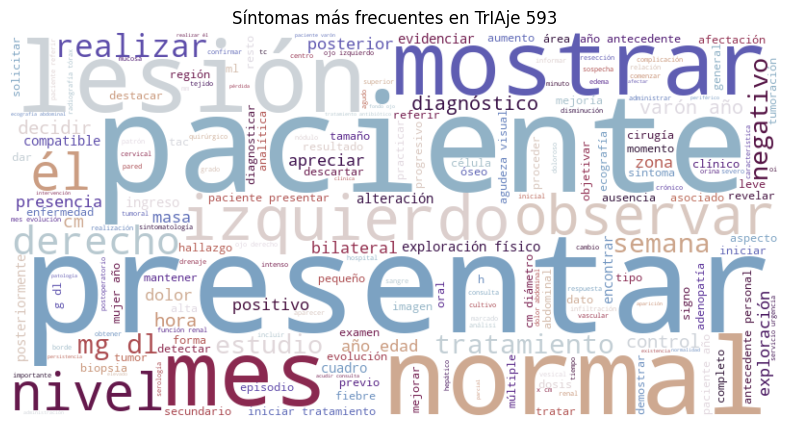

In [ ]:
from wordcloud import WordCloud

# Unir todo el texto procesado en un solo bloque gigante
texto_completo = " ".join(df['sintomas_procesados'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='twilight').generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Síntomas más frecuentes en TrIAje 593')
plt.show()

In [7]:
# Guardar solo las columnas que se necesitan para entrenar
df_final = df[['sintomas_procesados', 'especialidad']]

# Eliminar filas que hayan quedado vacías después de la limpieza
df_final = df_final[df_final['sintomas_procesados'].str.strip() != '']

df_final.to_csv('../data/datos_nlp_procesados.csv', index=False)
print("✅ Archivo 'datos_nlp_procesados.csv' guardado en /data ready para Machine Learning.")

✅ Archivo 'datos_nlp_procesados.csv' guardado en /data ready para Machine Learning.
